# Titanic Dataset - Pandas Basics

Date: 22 Feb 2026  
Dataset: Titanic  
Source: Kaggle Titanic Dataset

In [3]:
import pandas as pd

df = pd.read_csv("../data/Titanic-Dataset.csv")

In [5]:
df = pd.read_csv("../data/Titanic-Dataset.csv")

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df.shape
df.columns
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [8]:
df.isnull().sum().sort_values(ascending=False)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
dtype: int64

In [9]:
missing = df.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)
missing

Cabin       687
Age         177
Embarked      2
dtype: int64

In [10]:
threshold = 0.60
to_drop = df.columns[df.isnull().mean() > threshold]
to_drop

Index(['Cabin'], dtype='object')

In [11]:
df = df.drop(columns=to_drop)

In [12]:
num_cols = df.select_dtypes(include="number").columns
num_cols

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
for col in num_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].median()) #

In [14]:
cat_cols = df.select_dtypes(include=["object", "category"]).columns
cat_cols

Index(['Name', 'Sex', 'Ticket', 'Embarked'], dtype='object')

In [15]:
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna(df[col].mode()[0])

In [16]:
for col in cat_cols:
    if df[col].isnull().sum() > 0:
        df[col] = df[col].fillna("Unknown")

In [18]:
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C


In [20]:
df.select_dtypes(include="object").head()

,Name,Sex,Ticket,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,S
4,"Allen, Mr. William Henry",male,373450,S


In [21]:
df["Fare"] = pd.to_numeric(df["Fare"], errors="coerce")

In [23]:
df["Age"] = df["Age"].fillna(df["Age"].median())

In [24]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [25]:
cat_cols = df.select_dtypes(include="object").columns
df[cat_cols] = df[cat_cols].astype("category")

In [26]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    category
 4   Sex          891 non-null    category
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    category
 9   Fare         891 non-null    float64 
 10  Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(5)
memory usage: 115.1 KB


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [27]:
df.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
count,891.000000,891.000000,891.000000,891,891,891.000000,891.000000,891.000000,891,891.000000,891
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,3
top,NaN,NaN,NaN,"Abbing, Mr. Anthony",male,NaN,NaN,NaN,1601,NaN,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,646
mean,446.000000,0.383838,2.308642,NaN,NaN,29.361582,0.523008,0.381594,NaN,32.204208,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,13.019697,1.102743,0.806057,NaN,49.693429,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,22.000000,0.000000,0.000000,NaN,7.910400,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,35.000000,1.000000,0.000000,NaN,31.000000,NaN


In [3]:
df.shape

(891, 12)

In [4]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [5]:
df.groupby("Sex")["Survived"].mean()

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

My 5 Observation for this Data Set:
1) Sex influences survival

2) Pclass influences survival

3) Cabin has many missing values

4) Dataset likely used for classification problem

5) Proper Structure is required for better understanding

In [2]:
import pandas as pd

df = pd.read_csv("../data/Titanic-Dataset.csv")

df.head()
df.info()
df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [3]:
df.isna().sum().sort_values(ascending=False).head(10)

Cabin          687
Age            177
Embarked         2
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
dtype: int64

In [4]:
num_cols = df.select_dtypes(include="number").columns.tolist()
num_cols[:20], len(num_cols)

(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], 7)

In [5]:
x1, x2, x3 = num_cols[0], num_cols[1], num_cols[2]  # replace with your chosen columns
chosen = [x1, x2, x3]
chosen

['PassengerId', 'Survived', 'Pclass']

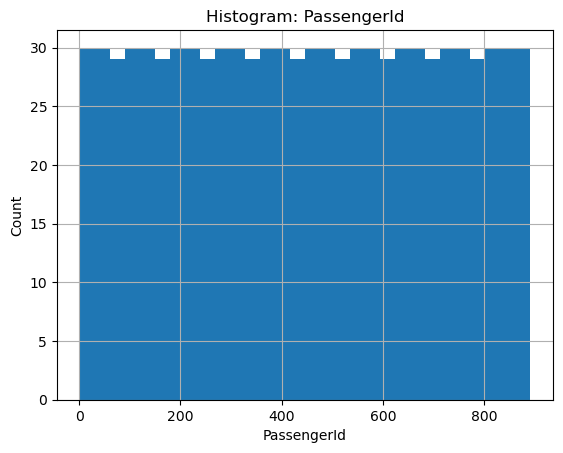

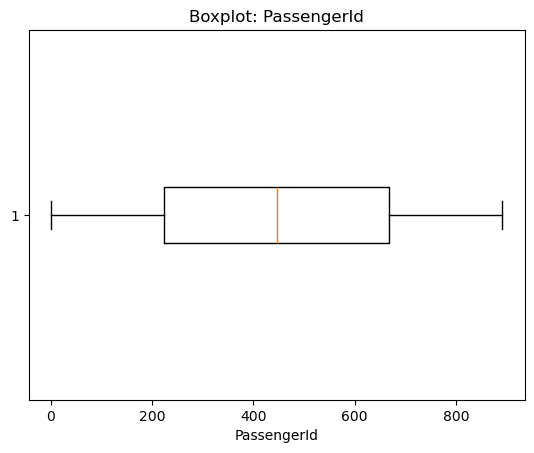

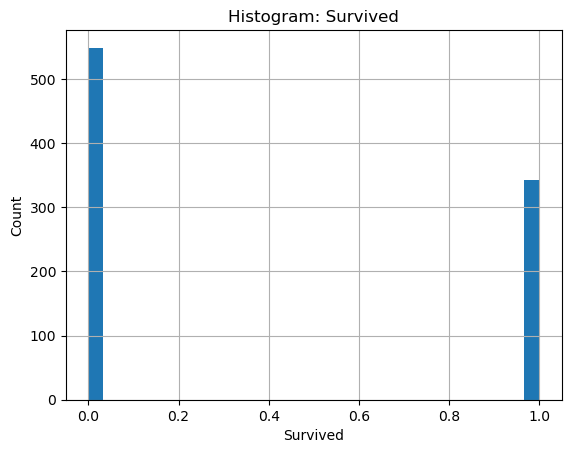

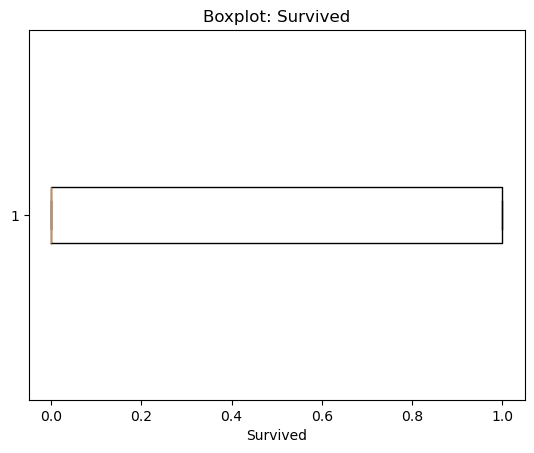

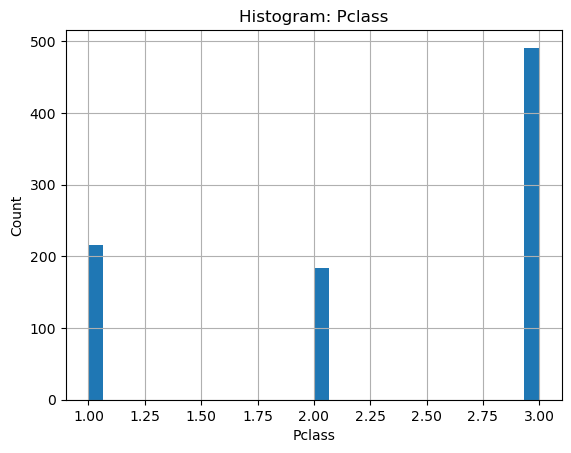

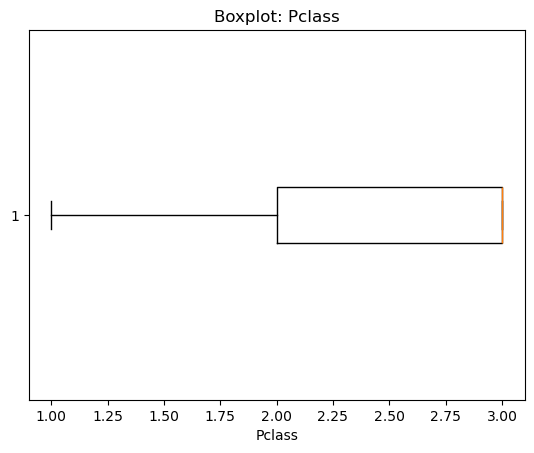

In [6]:
import matplotlib.pyplot as plt

for c in chosen:
    plt.figure()
    df[c].dropna().hist(bins=30)
    plt.title(f"Histogram: {c}")
    plt.xlabel(c)
    plt.ylabel("Count")
    plt.show()

    plt.figure()
    plt.boxplot(df[c].dropna(), vert=False)
    plt.title(f"Boxplot: {c}")
    plt.xlabel(c)
    plt.show()

In [7]:
summary = []
for c in chosen:
    s = df[c].dropna()
    q1, q3 = s.quantile(0.25), s.quantile(0.75)
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outlier_rate = ((s < lower) | (s > upper)).mean()
    summary.append({
        "col": c,
        "min": s.min(),
        "median": s.median(),
        "mean": s.mean(),
        "max": s.max(),
        "skew": s.skew(),
        "outlier_rate(IQR)": outlier_rate
    })

pd.DataFrame(summary).sort_values("outlier_rate(IQR)", ascending=False)

,col,min,median,mean,max,skew,outlier_rate(IQR)
0,PassengerId,1,446.0,446.000000,891,0.000000,0.0
1,Survived,0,0.0,0.383838,1,0.478523,0.0
2,Pclass,1,3.0,2.308642,3,-0.630548,0.0


Skew > 1 = heavily right-skewed (common for sales/profit/fare).

High outlier_rate = big extreme values affecting average.

In [8]:
cat_cols = df.select_dtypes(include=["object", "category", "bool"]).columns.tolist()
cat_cols

['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']

In [9]:
target = chosen[0]      # replace with your main numeric metric
cat1 = cat_cols[0]      # replace with your main category
cat2 = cat_cols[1] if len(cat_cols) > 1 else None
target, cat1, cat2

('PassengerId', 'Name', 'Sex')

In [11]:
if cat2:
    pivot = df.pivot_table(values=target, index=cat1, columns=cat2, aggfunc="mean")
    pivot

In [12]:
df.columns[df.columns.str.contains("date|time", case=False)]

Index([], dtype='object')

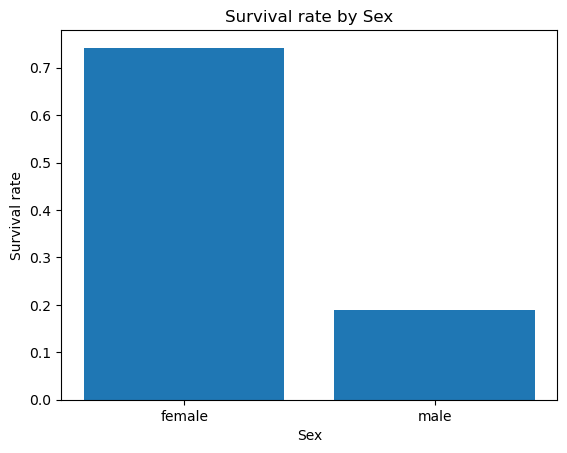

In [17]:
g = df.groupby("Sex")["Survived"].mean().sort_values(ascending=False)

plt.figure()
plt.bar(g.index.astype(str), g.values)
plt.title("Survival rate by Sex")
plt.xlabel("Sex"); plt.ylabel("Survival rate")
plt.show()

In [15]:
bins = [0, 12, 18, 35, 60, 100]
labels = ["Child(0-12)", "Teen(13-18)", "YoungAdult(19-35)", "Adult(36-60)", "Senior(61+)"]
df["AgeGroup"] = pd.cut(df["Age"], bins=bins, labels=labels, include_lowest=True)

(df.groupby("AgeGroup")["Survived"]
   .agg(["count","mean"])
   .rename(columns={"mean":"survival_rate"})
   .sort_values("survival_rate", ascending=False))

/var/folders/1w/925q5hqd7cs9kwcjpbkh_ggh0000gn/T/ipykernel_21872/90062936.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  (df.groupby("AgeGroup")["Survived"]


,count,survival_rate
AgeGroup,,
Child(0-12),69,0.579710
Teen(13-18),70,0.428571
Adult(36-60),195,0.400000
YoungAdult(19-35),358,0.382682
Senior(61+),22,0.227273
